In [2]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import f1_score, PrecisionRecallDisplay, precision_score, recall_score, roc_auc_score, RocCurveDisplay, roc_curve, confusion_matrix

from sklearn.linear_model import LogisticRegression

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/diabetes_data.csv')

In [4]:
df.head()
#outcome with 1, people have diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
sns.pairplot(df,hue='Outcome')

c:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Error in callback <function flush_figures at 0x0000018DAD4547C0> (for post_execute):


KeyboardInterrupt: 

<Axes: >

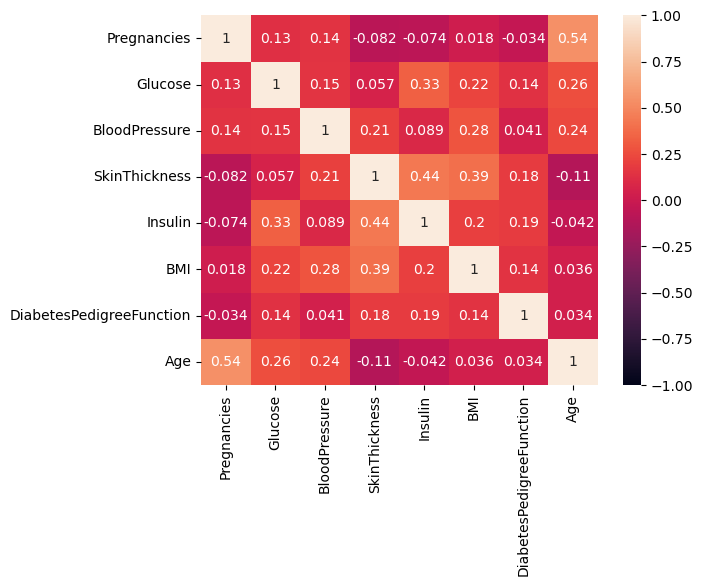

In [8]:
sns.heatmap(df.iloc[:,:8].corr(), annot=True, vmin=-1, vmax=1)

In [9]:
model_data = df[(df['Glucose']!=0) & (df['BloodPressure']!=0)& (df['Insulin']!=0) &(df['BMI']!=0)].drop('SkinThickness', axis=1)

model_data

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1
6,3,78,50,88,31.0,0.248,26,1
8,2,197,70,543,30.5,0.158,53,1
13,1,189,60,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...
753,0,181,88,510,43.3,0.222,26,1
755,1,128,88,110,36.5,1.057,37,1
760,2,88,58,16,28.4,0.766,22,0
763,10,101,76,180,32.9,0.171,63,0


<Axes: >

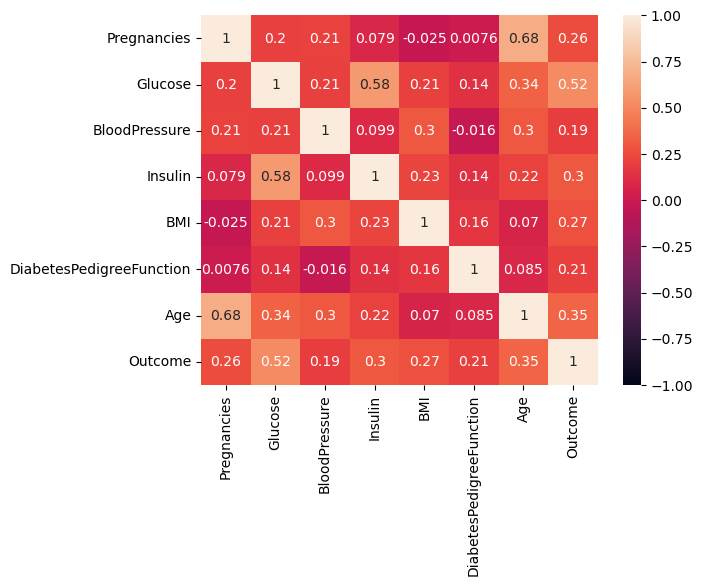

In [56]:
sns.heatmap(model_data.corr(), annot=True, vmin=-1, vmax=1)

In [10]:
model_data['Outcome'].value_counts()

Outcome
0    262
1    130
Name: count, dtype: int64

In [11]:
#check for imbalace
model_data.groupby('Outcome')['Pregnancies'].count()/len(model_data)

Outcome
0    0.668367
1    0.331633
Name: Pregnancies, dtype: float64

In [12]:
train, test = train_test_split(model_data, test_size=0.3,random_state=1234)

In [13]:
test.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
94,2,142,82,64,24.7,0.761,21,0
99,1,122,90,220,49.7,0.325,31,1
593,2,82,52,115,28.5,1.699,25,0
127,1,118,58,94,33.3,0.261,23,0
521,3,124,80,130,33.2,0.305,26,0


In [14]:
model_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',

       'DiabetesPedigreeFunction', 'Age']

target = 'Outcome'

In [16]:
#cross validation - divide dataset to 5 sections, train 4 sections and test 1 section, repeat the process 5 times
#quickly create 5 models and pick the best one
scores = cross_val_score(LogisticRegression(), train[features], train[target], cv=5, scoring='accuracy')

c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [17]:
scores

array([0.8       , 0.78181818, 0.74545455, 0.67272727, 0.7962963 ])

from the above result, helps to validate different data

In [18]:
#calculate average score
np.mean(scores)

0.7592592592592593

In [19]:
#building an actual model
logreg = LogisticRegression().fit(train[features], train[target])

c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
logreg.coef_

array([[1.36478372e-01, 3.16928963e-02, 2.53023224e-03, 7.51290392e-04,
        7.73955888e-02, 1.12245831e+00, 1.19998222e-02]])

In [21]:
test[features]

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
94,2,142,82,64,24.7,0.761,21
99,1,122,90,220,49.7,0.325,31
593,2,82,52,115,28.5,1.699,25
127,1,118,58,94,33.3,0.261,23
521,3,124,80,130,33.2,0.305,26
...,...,...,...,...,...,...,...
325,1,157,72,168,25.6,0.123,24
747,1,81,74,57,46.3,1.096,32
497,2,81,72,76,30.1,0.547,25
282,7,133,88,155,32.4,0.262,37


In [22]:
y_pred=logreg.predict(test[features])

In [23]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
test[target]
#actual data outcome

94     0
99     1
593    0
127    0
521    0
      ..
325    0
747    0
497    0
282    0
514    0
Name: Outcome, Length: 118, dtype: int64

In [25]:
final_scores = pd.DataFrame([test[target].to_list(), y_pred]).T.rename(columns={0:'Actual',1:'Predicted'})

In [26]:
final_scores['difference'] = final_scores['Actual'] - final_scores['Predicted']

In [27]:
final_scores[final_scores['difference'] != 0].count()/len(final_scores)

Actual        0.194915
Predicted     0.194915
difference    0.194915
dtype: float64

In [28]:
pd.Series(test[target])

94     0
99     1
593    0
127    0
521    0
      ..
325    0
747    0
497    0
282    0
514    0
Name: Outcome, Length: 118, dtype: int64

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(test[target],y_pred)

0.8050847457627118

In [31]:
final_scores[final_scores['Actual'] ==1].count()

Actual        33
Predicted     33
difference    33
dtype: int64

In [32]:
final_scores[(final_scores['Actual'] == 1)&(final_scores['difference'] != 0)].count()

Actual        13
Predicted     13
difference    13
dtype: int64

In [33]:
# 14 / 33 are FALSE NEGATIVES > the model predicted they do NOT have diabetes, even though they do

14/33

0.42424242424242425

In [34]:
final_scores[final_scores['Actual'] == 0].count()

Actual        85
Predicted     85
difference    85
dtype: int64

In [35]:
final_scores[(final_scores['Actual'] == 0)&(final_scores['difference'] != 0)].count()

Actual        10
Predicted     10
difference    10
dtype: int64

In [36]:
# out of the 85 non-diabetic people, the model wrongfully predicted that 10 of them have diabetes when they dont

# FALSE POSITIVES

10/85

0.11764705882352941

In [37]:
final_scores[(final_scores['Actual'] == 0)&(final_scores['difference'] != 0)]

,Actual,Predicted,difference
14,0,1,-1
39,0,1,-1
48,0,1,-1
56,0,1,-1
60,0,1,-1
64,0,1,-1
91,0,1,-1
93,0,1,-1
104,0,1,-1
105,0,1,-1


Text(0.5, 23.52222222222222, 'Predicted Classes')

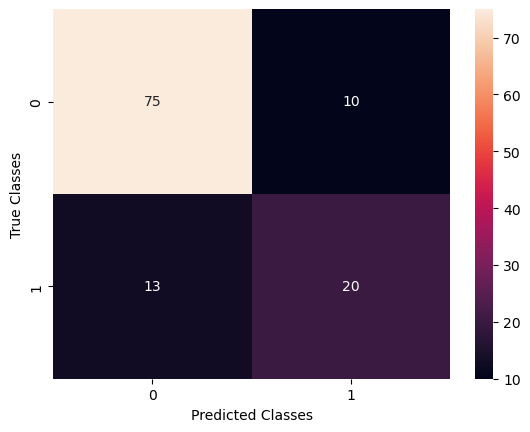

In [38]:
sns.heatmap(confusion_matrix(test[target],y_pred), annot=True)
plt.ylabel('True Classes')

plt.xlabel('Predicted Classes')

TRUE NEGATIVE IN THE LEFT TOP CONER, FALSE POSITIVE IN THE RIGHT TOP; FALSE NEGATIVE IN THE LEFT BOTTOM, TRUE POSITIVE IN THE RIGHT BOTTOM

In [39]:
# Precision

# TRUE POSITIVES / (TRUE POSITIVES + FALSE POSITIVES)

19 / (19+10)

0.6551724137931034

In [40]:
precision_score(test[target],y_pred)

0.6666666666666666

In [41]:
# Recall

# TRUE POSITIVES / (TRUE POSITIVES + FALSE NEGATIVES)

19/(19+14)

0.5757575757575758

In [42]:
recall_score(test[target],y_pred)

0.6060606060606061

In [43]:
#F1 Score
# (2*TRUE POSITIVES) / (2*TP + FP + FN)
(2 * 19) / (2*19+10+14)

0.6129032258064516

In [44]:
f1_score(test[target],y_pred)
#closer to 1 the better precision

0.6349206349206349

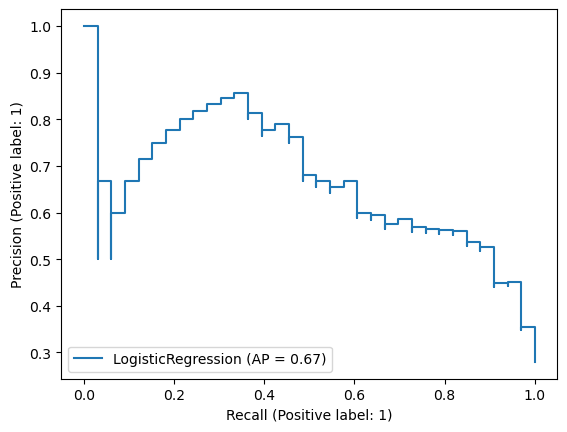

In [45]:
#precision recall curve
display = PrecisionRecallDisplay.from_estimator(logreg, test[features], test[target])

the curve closer to the top right, the model is better

adjusting the pobability threshold

In [46]:
probs = logreg.predict_proba(test[features])

In [47]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [48]:

probs

array([[0.71614396, 0.28385604],
       [0.49820276, 0.50179724],
       [0.81299818, 0.18700182],
       [0.849711  , 0.150289  ],
       [0.75191697, 0.24808303],
       [0.52025944, 0.47974056],
       [0.7021363 , 0.2978637 ],
       [0.66864715, 0.33135285],
       [0.81463872, 0.18536128],
       [0.79349212, 0.20650788],
       [0.93928699, 0.06071301],
       [0.22532231, 0.77467769],
       [0.93608859, 0.06391141],
       [0.89247165, 0.10752835],
       [0.41237521, 0.58762479],
       [0.67883836, 0.32116164],
       [0.75316688, 0.24683312],
       [0.41921437, 0.58078563],
       [0.71516717, 0.28483283],
       [0.88114907, 0.11885093],
       [0.11006579, 0.88993421],
       [0.26024237, 0.73975763],
       [0.79419746, 0.20580254],
       [0.78927455, 0.21072545],
       [0.89420516, 0.10579484],
       [0.55087732, 0.44912268],
       [0.83305883, 0.16694117],
       [0.18764528, 0.81235472],
       [0.63518303, 0.36481697],
       [0.67505573, 0.32494427],
       [0.

In [49]:
#use 70% threshold
new_predictions=[]
for i in probs[:,1]:
    if i >= 0.7:
        new_predictions.append(1)
    else:
        new_predictions.append(0)

Text(0.5, 23.52222222222222, 'New Predicted Classes')

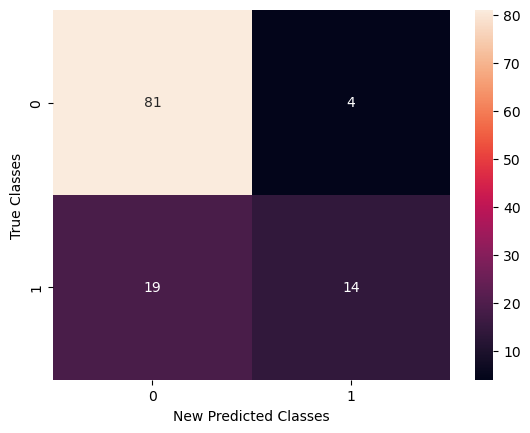

In [50]:
sns.heatmap(confusion_matrix(test[target], new_predictions), annot=True)
plt.ylabel('True Classes')
plt.xlabel('New Predicted Classes')

In [51]:
precision_score(test[target], new_predictions)

0.7777777777777778

In [52]:
recall_score(test[target],new_predictions)

0.42424242424242425

In [53]:
f1_score(test[target], new_predictions)

0.5490196078431373

higher recall, higher precision

In [54]:
fpr, tpr, thresholds = roc_curve(test[target], probs[:,1])
#trade off between true positive and false positive

Text(0, 0.5, 'True Positive Rate')

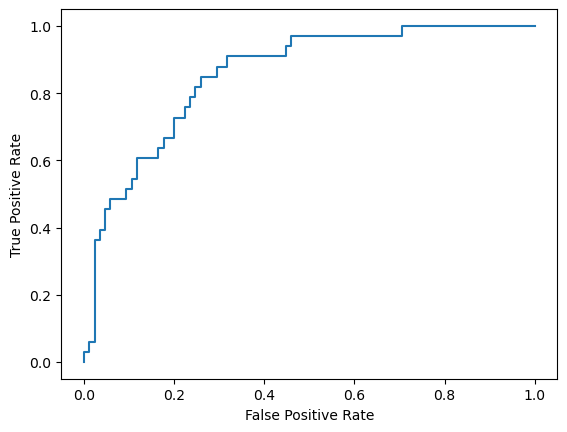

In [55]:
plt.plot(fpr, tpr)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

8 things to check the classification models